In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
%cd /content/drive/MyDrive/24787/hw3/data_and_code

/content/drive/MyDrive/24787/hw3/data_and_code


### Note for question1
- Please follow the template to complete q1
- You may create new cells to report your results and observations

In [1]:
# Import libraries
# load packages
import numpy as np
import pandas as pd
import time
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## A. Load data and plot
### TODO
- load data
- plot the points of different labels with different color

(100, 2)


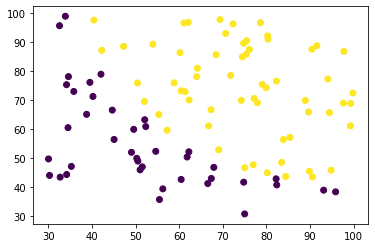

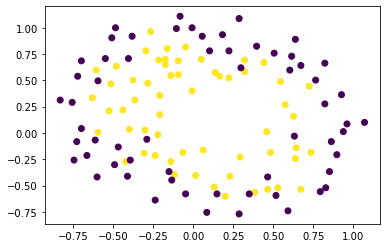

In [2]:
# Load dataset
data1 = np.loadtxt("ex2data1.txt",delimiter=',')
data2 = np.loadtxt("ex2data2.txt",delimiter=',')

X1 = data1[:,:-1]
Y1 = data1[:,-1]
X2 = data2[:,:-1]
Y2 = data2[:,-1]
print(X1.shape)
print(Y1.shape)
# y0 = np.argwhere(Y1 == 0)
# y1 = np.argwhere(Y1 == 1)
# x0 = X1[y0]
# x0=x0.squeeze()
# x1 = X1[y1]
# # x0 = X1[y0]
# x1=x1.squeeze()
# plt.scatter(x0[:,0],x0[:,1],c="green")
# plt.scatter(x1[:,0],x1[:,1],c="blue")
# plt.show()
# x1 = X1[y1]
# x1 =x1.squeeze()


fig =plt.figure()
plt.scatter(X1[:,0],X1[:,1],c=Y1)
fig =plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=Y2)
Y1_reshape = Y1.reshape(-1,1)





# Plot points


## B. sigmoid function
### TODO
- name the sigmoid function **sigmoid()**

In [3]:
#Define sigmoid function

def sigmoid(mat):
    return (1+np.exp(-mat))**(-1)

## C. loss function, gradient function
### TODO

- Define loss function and name it **loss()**
- Define Gradient Function and name it **gradient()**

In [4]:
#Define loss function
def loss(X,w,Y,e):
    return np.mean(-Y*np.log(sigmoid(X @ w)+e)-(1-Y)*np.log(1-sigmoid(X @ w)+e))

#Define gradient function
def gradient(X,w,Y):
    return np.mean((sigmoid(X @ w)-Y)*X,axis= 0).reshape(-1,1)

## D. prediction function, gradient descent and plot meshgrids

### TODO

- Define a prediction function and name it **predict()**
- Using all above functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- Use contourf/meshgrids or any other command to visualize the boundary conditions

/var/folders/21/7pfzbrfs23s7jb3qy12xqql40000gn/T/ipykernel_6068/570009302.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  return (1+np.exp(-mat))**(-1)


0.2999998948553114
[[-64.7219727 ]
 [  0.52544169]
 [  0.51879265]]


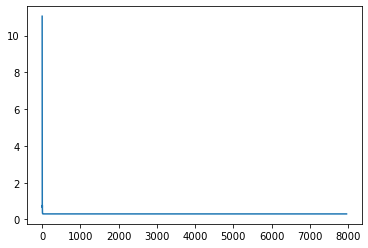

In [5]:
#Define prediction function
def predict(w,X):
    vector = X@w
    p = sigmoid(vector)
    pred = np.empty(vector.shape)
    # pos0 = np.argwhere(p >0.5)
    # pos1 = np.argwhere(p<=0.5)
    pred[p>0.5] =1
    pred[p<=0.5] = 0
    # print(p[0]>0.5)
    # print(f"len pos0 {len(pos0)}")
    # pred[pos0] = 1
    # pred[pos1] = 0 
    return np.hstack((p, pred))


one_arr = np.ones((X1.shape[0],X1.shape[1]+1))
one_arr[:,1:] = X1

step = 0.01
iter = 1000
J_lst = []
e = 1e-8
J = 100
w = np.array([[-65],[0],[0]],dtype=float)
error  = 1e5
prev = 0
while error >1e-4 or J>0.3:
    # y = np.random.random()
    J = loss(one_arr,w,Y1_reshape,e)
    G = gradient(one_arr,w,Y1_reshape)
    # print(f"W.shape G.shape {w.shape} {G.shape}")
    # print()
    w -= step*G
    error = np.abs(J-prev)
    # print(f"loss {J} error = {error}")
    prev = J
# print(w)
    J_lst.append(J)
print(J)
print(w)
plt.plot(np.arange(len(J_lst)), J_lst)
plt.show()


#Call prediction function and Plot meshgrid to visualize 


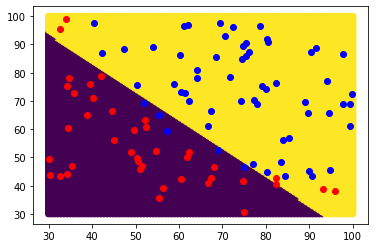

In [6]:
xx = np.linspace(30, 100, 100)
yy = np.linspace(30, 100, 100)
xv, yv = np.meshgrid(xx, yy)
xr= xv.ravel()
yr = yv.ravel()
new_X = np.ones((len(xr),3))

new_X[:,1] = xr
new_X[:,2] = yr
# print(xv)
# z = w[0]+w[1]*xv.ravel()+w[2]*yv.ravel()
# print(z)
# s = sigmoid(z)
# print(s)
soft = predict(w,new_X)
# print(soft)
y0_1 = np.argwhere(Y1 == 0)
y1_1 = np.argwhere(Y1 == 1)
x0_1 = X1[y0_1]
x0_1=x0_1.squeeze()
x1_1 = X1[y1_1]
# x0 = X1[y0]
x1_1=x1_1.squeeze()

plt.scatter(xv.ravel(),yv.ravel(),c=soft[:,1])
plt.scatter(x0_1[:,0],x0_1[:,1],c="red")
plt.scatter(x1_1[:,0],x1_1[:,1],c="blue")
plt.show()
# plt.scatter(xx,yy,c=)

## E. Feature mapping, regularized Cost function, gradient function and gradient descent
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up
- Create a regularized loss function & gradient function and name it **loss_reg()** and **gradient_reg()**
- Using both these functions implement gradient descent with appropriate initialization, learning rates & # of initialization
- Use contourf/meshgrids or any other command to visualize the boundary conditions

(118, 28)
n 118
X28 (118, 28) w.shape(28, 1)
[[ 0.01753118]
 [ 0.00592763]
 [-0.01741612]
 [-0.03815988]
 [-0.01318861]
 [-0.05478138]
 [-0.02262663]
 [-0.00889936]
 [-0.00769235]
 [-0.01838177]
 [-0.04120096]
 [-0.00351215]
 [-0.01408006]
 [-0.0023662 ]
 [-0.04324833]
 [-0.03183341]
 [-0.00501652]
 [-0.00629784]
 [-0.00357731]
 [-0.00470336]
 [-0.02093272]
 [-0.04092316]
 [-0.00155709]
 [-0.00794965]
 [-0.00038832]
 [-0.00699722]
 [-0.00107886]
 [-0.03404369]]


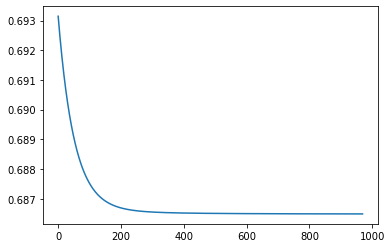

In [46]:
# Transform points to 28D space
Y2_reshape = Y2.reshape(-1,1)

def map_feature(X,feature_num=6):
  x1 = X[:,0].reshape(-1,1)
  x2 = X[:,1].reshape(-1,1)
  # feature_lst = []
  count = 0
  feature_lst = None
  for j in range(feature_num+1):
    for k in range(j+1):
      if count ==0:
        feature_lst = (x1**(k))*(x2**(j-k))
      else:
        feature_lst= np.hstack((feature_lst,(x1**(k))*(x2**(j-k))))
      count +=1
  print(feature_lst.shape)
  return feature_lst
# print(f"X2 {X2}")
#Define cost function

def loss_reg(X,Y,w,lamda, n):
    # just for the last part w, it will not take the bias term 
    w_partial = w.copy()
    w_partial[0,0] = 0
    return np.mean(-Y*np.log(sigmoid(X@w)+1e-8) - (1-Y)*np.log(1-sigmoid(X@w)+1e-8) )+ ((w_partial.T)@w_partial*(lamda/(2*len(X))))[0][0]

    # return (np.mean(-Y*np.log(sigmoid(X @ w)+e)-(1-Y)*np.log(1-sigmoid(X @ w)+e))+lamda/(2*n)*(w_partial.T @ w_partial))[0][0]
    # return (np.mean(-Y*np.log(sigmoid(X @ w)+e)-(1-Y)*np.log(1-sigmoid(X @ w)+e))+lamda/(2*n)*(w[1:].T @ w[1:]))[0][0]
def gradient_reg(X, Y, w,lamda,n):
    # g0 = np.mean((sigmoid(X @ w)-Y)*X[:,0]).reshape(-1,1)
    # g1 = (np.mean((sigmoid(X @ w)-Y)*X[:,1:], axis= 0))+(lamda/n*w[1:]).T
    # g = (np.hstack((g0,g1))).reshape((-1,1))
    w_partial = w.copy()
    w_partial[0,0] = 0
    g = np.mean((sigmoid((X@w))-Y)*X,axis=0).reshape(-1,1)+lamda * w_partial/len(X)

    # g = np.mean((sigmoid(X @ w)-Y)*X, axis= 0).reshape((-1,1))+lamda * w_partial/n
    # print(g.shape)
    # print(f"g0 {g0} g1{g1.shape} sigmoid(X @ w)-Y)*X[:,1:] {((sigmoid(X @ w)-Y)*X[:,1:]).shape} lamda/n*w[1:] {(lamda/n*w[1:]).shape} g {g.shape}")
    return g
# def gradient_4(X, Y, w,lamda):
    # return np.mean(( sigmoid(X @ w)-Y)*X, axis= 0).reshape(-1,1)

# print(loss_3(X28,Y2,w,lamda,n))
# print(gradient_3(X28,Y2,w,lamda,n))

lamda = 100
step = 0.01
iter = 1e6
J_lst = []
e = 1e-8
J = 100
X28 = map_feature(X2,6)
w = np.zeros((28,1))
# print(f"X28 {X28}")
# w = np.random.rand(28,1)
n = X28.shape[0]
print(f'n {n}')
print(f"X28 {X28.shape} w.shape{w.shape}")
# w = np.array([[-65],[0],[0]],dtype=float)
error  = 1e5
prev = 0
count =0
while error >1e-8 and count<iter:
    # y = np.random.random()
    J = loss_reg(X28,Y2_reshape,w,lamda,n)
    G = gradient_reg(X28,Y2_reshape,w,lamda,n)
    # print(f"W.shape G.shape {w.shape} {G.shape}")
    # print()
    w -= step*G
    error = np.abs(J-prev)
    # print(f"loss {J} error = {error}")
    prev = J
# print(w)
    J_lst.append(J)
    count+=1
    # print(J)
print(w)
plt.plot(np.arange(len(J_lst)), J_lst)
plt.show()

#Define gradient function



#Define prediction function which implements regularized logistic regression



##Call prediction function and Plot meshgrid to visualize 

(10000, 28)
[[0.46393907 0.        ]
 [0.46599713 0.        ]
 [0.46788372 0.        ]
 ...
 [0.18426368 0.        ]
 [0.17250901 0.        ]
 [0.16064436 0.        ]]


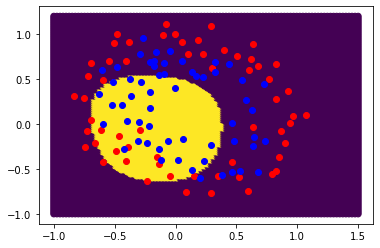

In [47]:
xx = np.linspace(-1, 1.5, 100)
yy = np.linspace(-1, 1.2, 100)
xv, yv = np.meshgrid(xx, yy)
xr= xv.ravel()
yr = yv.ravel()
# new_X = np.ones((len(xr),3))
xc = xr.reshape(-1,1)
yc = yr.reshape(-1,1)
fake_x = np.hstack((xc,yc))
# print(xr.shape)
new_X = map_feature(fake_x)

# new_X[:,1] = xr
# new_X[:,2] = yr

# print(xv)
# z = w[0]+w[1]*xv.ravel()+w[2]*yv.ravel()
# print(z)
# s = sigmoid(z)
# print(s)
soft = predict(w,new_X)
print(soft)
# plt.scatter(X2[:,0],X2[:,1],c=soft[:,1])

y0_2 = np.argwhere(Y2 == 0)
y1_2 = np.argwhere(Y2 == 1)
x0_2 = X2[y0_2]
x0_2=x0_2.squeeze()
x1_2 = X2[y1_2]
# x0 = X1[y0]
x1_2=x1_2.squeeze()


plt.scatter(xv.ravel(),yv.ravel(),c=soft[:,1])
plt.scatter(x0_2[:,0],x0_2[:,1],c="red")
plt.scatter(x1_2[:,0],x1_2[:,1],c="blue")
plt.show()
# plt.scatter(X2[:,0],X2[:,1],c=Y2)


plt.show()

(10000, 28)
[[ 0.12946289]
 [ 0.17200978]
 [-0.00779557]
 [-0.25054017]
 [-0.11519745]
 [-0.41930039]
 [-0.10078985]
 [-0.06331398]
 [-0.05665538]
 [-0.06856748]
 [-0.2749385 ]
 [-0.02933218]
 [-0.11213324]
 [-0.01400435]
 [-0.32522203]
 [-0.18340302]
 [-0.04087389]
 [-0.04806356]
 [-0.0216507 ]
 [-0.03658081]
 [-0.11356418]
 [-0.26630143]
 [-0.01259278]
 [-0.06196543]
 [-0.00082223]
 [-0.05632726]
 [-0.00335339]
 [-0.24715063]]


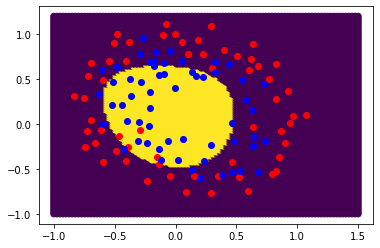

In [49]:
from sklearn import linear_model 

clf = linear_model.LogisticRegression(penalty="l2", solver="liblinear",tol=1e-6,max_iter=int(1e6))
clf.set_params(C=0.1)
clf.fit(X28,Y2)

# print(clf.coef_.reshape(-1,1))
xx = np.linspace(-1, 1.5, 100)
yy = np.linspace(-1, 1.2, 100)
xv, yv = np.meshgrid(xx, yy)
xr= xv.ravel()
yr = yv.ravel()
# new_X = np.ones((len(xr),3))
xc = xr.reshape(-1,1)
yc = yr.reshape(-1,1)
fake_x = np.hstack((xc,yc))
# print(xr.shape)
new_X = map_feature(fake_x)
clf_w = clf.coef_.reshape(-1,1)
print(clf_w)
soft = predict(clf_w,new_X)
# print(soft)
# plt.scatter(X2[:,0],X2[:,1],c=soft[:,1])
plt.scatter(xr,yr,c=soft[:,1])
plt.scatter(x0_2[:,0],x0_2[:,1],c="red")
plt.scatter(x1_2[:,0],x1_2[:,1],c="blue")
plt.show()
# w = 
# coefs_ = [] 
# for c in cs:

#   clf.set_params(C=c)

#   clf.fit(X, y)

#   coefs .append(clf.coef .ravel().copy())

## F. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


In [ ]:
# lambda = 0

# lambda = 1

# lambda = 100